<a href="https://colab.research.google.com/github/harsh903/covid/blob/main/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("/content/covid_data.csv")

In [77]:
df.head()

,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS1,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA13,ABCA2,ABCA3,...,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,C1,39,male,NonICU,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,0.0,0.00,0.0,0.00,22.93,7.12,17.19,61.08,0.31,21.59,0.18,13.52,2.43,9.63,6.38,19.45,0.21,45.83,5.60,9.63,32.30,0.32,0.0,0.49,8.47,0.37,...,0.65,16.21,1.47,4.46,0.54,4.86,1.23,0.04,6.70,7.59,8.71,3.66,0.08,12.79,0.00,2.53,0.08,0.0,5.66,6.00,0.0,4.96,0.97,0.24,18.40,8.94,30.43,2.56,10.06,5.93,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,C2,63,male,NonICU,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,0.0,0.06,0.0,0.00,21.69,6.46,13.06,54.54,0.00,19.22,0.08,13.91,2.15,11.80,4.83,12.14,0.42,39.37,9.79,10.36,15.84,0.37,0.0,3.36,9.49,0.71,...,0.48,21.37,1.98,4.54,0.34,2.72,1.00,0.00,6.52,8.00,6.59,2.98,0.12,13.59,0.00,1.84,0.00,0.0,5.45,3.37,0.0,2.93,1.05,0.36,11.58,7.70,25.56,2.02,6.86,7.25,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,C3,33,male,NonICU,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,0.0,0.00,0.0,0.00,18.27,3.92,13.35,25.19,0.65,8.72,0.05,5.60,1.08,4.04,2.76,7.64,0.04,42.35,5.34,4.59,34.38,0.29,0.0,0.26,14.24,0.17,...,0.20,24.52,2.77,1.85,0.14,2.37,0.84,0.00,4.48,6.31,5.37,4.18,0.11,12.92,0.00,0.38,0.04,0.0,5.90,5.58,0.0,4.87,1.70,0.04,7.99,4.41,31.86,2.19,4.99,2.26,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,C4,49,male,NonICU,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,0.0,0.00,0.0,0.00,26.69,8.74,17.53,67.95,0.08,20.83,0.03,15.34,2.69,14.61,8.23,18.94,0.41,41.92,4.73,11.02,14.24,0.31,0.0,0.13,6.37,0.94,...,1.16,22.06,4.57,3.80,0.34,5.99,1.75,0.08,7.65,12.40,8.65,4.47,0.40,17.74,0.06,2.09,0.00,0.0,6.81,4.76,0.0,4.93,0.88,0.28,14.47,15.71,31.98,1.60,10.84,9.58,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,C5,49,male,NonICU,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,0.0,0.00,0.0,0.03,17.02,7.26,10.14,18.29,1.02,7.46,0.10,6.29,0.55,5.32,5.23,11.54,0.21,30.56,1.50,4.42,18.39,0.19,0.0,0.16,5.90,0.17,...,0.21,23.32,1.29,1.72,0.21,1.72,0.72,0.00,5.41,6.11,4.88,5.52,0.11,12.15,0.00,1.01,0.00,0.0,2.92,3.85,0.0,3.41,0.57,0.12,16.26,4.02,24.65,1.27,7.55,3.75,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [78]:
df.info

<bound method DataFrame.info of     Sample  Age     Sex Severity  A1BG  ...  ZYG11A  ZYG11B     ZYX  ZZEF1  ZZZ3
0       C1   39    male   NonICU  0.49  ...    0.06    8.17  363.01  19.17  6.05
1       C2   63    male   NonICU  0.29  ...    0.14    8.20  399.80  15.72  4.12
2       C3   33    male   NonICU  0.26  ...    0.28    3.62  430.35  13.95  1.81
3       C4   49    male   NonICU  0.45  ...    0.27    7.88  209.25  14.78  7.15
4       C5   49    male   NonICU  0.17  ...    0.07    5.96  272.91   8.69  2.70
..     ...  ...     ...      ...   ...  ...     ...     ...     ...    ...   ...
121   NC22   63    male   NonICU  0.30  ...    0.24    1.58  447.14   3.04  1.00
122   NC23   42  female   NonICU  0.70  ...    0.12    1.57  748.55   4.55  1.56
123   NC24   32  female   NonICU  0.75  ...    0.14    5.05  437.62  10.34  3.99
124   NC25   62    male   NonICU  2.80  ...    0.33    1.07  369.66   1.83  0.96
125   NC26   36    male      ICU  0.22  ...    0.10    1.25  577.13   2.08  0

In [79]:
df.columns

Index(['Sample', 'Age', 'Sex', 'Severity', 'A1BG', 'A1CF', 'A2M', 'A2ML1',
       'A3GALT2', 'A4GALT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=19476)

In [80]:
df.isnull().sum()

Sample      0
Age         0
Sex         0
Severity    0
A1BG        0
           ..
ZYG11A      0
ZYG11B      0
ZYX         0
ZZEF1       0
ZZZ3        0
Length: 19476, dtype: int64

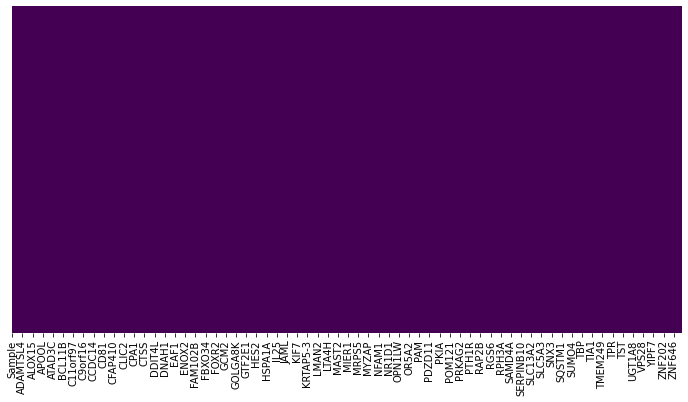

In [81]:
f = plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
df['Severity'].value_counts()

ICU       66
NonICU    60
Name: Severity, dtype: int64

In [83]:
df.Severity = [1 if i == "NonICU" else 0 for i in df.Severity]

In [84]:
df.Sex = [1 if i == "Male" else 0 for i in df.Sex]

In [85]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Sample']= label_encoder.fit_transform(df['Sample'])
 
df['Sample'].unique()

array([  0,  15,  26,  37,  48,  58,  69,  80,  89,   1,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        81,  82,  83,  84,  85,  86,  87,  88,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99,   2,   3,   4,   5, 100, 111, 119, 120,
       121, 122, 123, 124, 125, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 116, 117, 118])

In [86]:
# Filling the null values using KnnImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [87]:
df.head()

,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS1,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA12,ABCA13,ABCA2,ABCA3,...,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.0,39.0,0.0,1.0,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,0.0,0.00,0.0,0.00,22.93,7.12,17.19,61.08,0.31,21.59,0.18,13.52,2.43,9.63,6.38,19.45,0.21,45.83,5.60,9.63,32.30,0.32,0.0,0.49,8.47,0.37,...,0.65,16.21,1.47,4.46,0.54,4.86,1.23,0.04,6.70,7.59,8.71,3.66,0.08,12.79,0.00,2.53,0.08,0.0,5.66,6.00,0.0,4.96,0.97,0.24,18.40,8.94,30.43,2.56,10.06,5.93,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,15.0,63.0,0.0,1.0,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,0.0,0.06,0.0,0.00,21.69,6.46,13.06,54.54,0.00,19.22,0.08,13.91,2.15,11.80,4.83,12.14,0.42,39.37,9.79,10.36,15.84,0.37,0.0,3.36,9.49,0.71,...,0.48,21.37,1.98,4.54,0.34,2.72,1.00,0.00,6.52,8.00,6.59,2.98,0.12,13.59,0.00,1.84,0.00,0.0,5.45,3.37,0.0,2.93,1.05,0.36,11.58,7.70,25.56,2.02,6.86,7.25,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,26.0,33.0,0.0,1.0,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,0.0,0.00,0.0,0.00,18.27,3.92,13.35,25.19,0.65,8.72,0.05,5.60,1.08,4.04,2.76,7.64,0.04,42.35,5.34,4.59,34.38,0.29,0.0,0.26,14.24,0.17,...,0.20,24.52,2.77,1.85,0.14,2.37,0.84,0.00,4.48,6.31,5.37,4.18,0.11,12.92,0.00,0.38,0.04,0.0,5.90,5.58,0.0,4.87,1.70,0.04,7.99,4.41,31.86,2.19,4.99,2.26,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,37.0,49.0,0.0,1.0,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,0.0,0.00,0.0,0.00,26.69,8.74,17.53,67.95,0.08,20.83,0.03,15.34,2.69,14.61,8.23,18.94,0.41,41.92,4.73,11.02,14.24,0.31,0.0,0.13,6.37,0.94,...,1.16,22.06,4.57,3.80,0.34,5.99,1.75,0.08,7.65,12.40,8.65,4.47,0.40,17.74,0.06,2.09,0.00,0.0,6.81,4.76,0.0,4.93,0.88,0.28,14.47,15.71,31.98,1.60,10.84,9.58,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,48.0,49.0,0.0,1.0,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,0.0,0.00,0.0,0.03,17.02,7.26,10.14,18.29,1.02,7.46,0.10,6.29,0.55,5.32,5.23,11.54,0.21,30.56,1.50,4.42,18.39,0.19,0.0,0.16,5.90,0.17,...,0.21,23.32,1.29,1.72,0.21,1.72,0.72,0.00,5.41,6.11,4.88,5.52,0.11,12.15,0.00,1.01,0.00,0.0,2.92,3.85,0.0,3.41,0.57,0.12,16.26,4.02,24.65,1.27,7.55,3.75,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [88]:
from sklearn.feature_selection import chi2

In [89]:
x = df.drop(["Severity"], axis = 1)

y= df["Severity"]

In [90]:
chi_scores = chi2(x,y)

In [91]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = True , inplace = True)

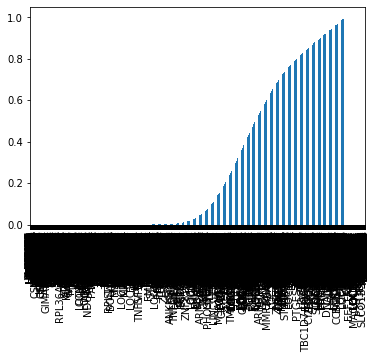

In [57]:
p_values.plot.bar()

In [92]:
p_values = [p_values]

for x in p_values:
  print(p_values)

[TMEM123    0.0
RPL15      0.0
HMGB2      0.0
DEFA1      0.0
DEFA1B     0.0
          ... 
ZIC5       NaN
ZNF280A    NaN
ZNF804B    NaN
ZNRF4      NaN
ZPBP       NaN
Length: 19475, dtype: float64]
